## Mobile Price Prediction 

### In this project we are going to do perdict the house price based on some of the feature.Ok let's get start the prediction!!!

### Import the Libraires and Dataset

In [130]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [131]:
# Import Dataset
df = pd.read_csv("/content/Cellphone.csv")
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [132]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

### Data Preprocessing

In [133]:
# Drop the Unwannted column the first one
df.drop(['Product_id'],axis=1,inplace=True)

In [134]:
# After removing the dataset look like
df.head()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [135]:
# Checking null values into the dataset
df.isnull().sum()

Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [136]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         161 non-null    int64  
 1   Sale          161 non-null    int64  
 2   weight        161 non-null    float64
 3   resoloution   161 non-null    float64
 4   ppi           161 non-null    int64  
 5   cpu core      161 non-null    int64  
 6   cpu freq      161 non-null    float64
 7   internal mem  161 non-null    float64
 8   ram           161 non-null    float64
 9   RearCam       161 non-null    float64
 10  Front_Cam     161 non-null    float64
 11  battery       161 non-null    int64  
 12  thickness     161 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 16.5 KB


In [137]:
df.dtypes

Price             int64
Sale              int64
weight          float64
resoloution     float64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem    float64
ram             float64
RearCam         float64
Front_Cam       float64
battery           int64
thickness       float64
dtype: object

In [138]:
# Describe
df.describe()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [139]:
# # Dropping the Name columns
# df.drop(['Brand me'],axis=1,inplace=True)

### Handling Missing Values

In [140]:
# We should handling these null or missing values
df.isnull().sum()

Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [141]:
# Final dataset for build a model
df.head()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


### Exploratory Data Analysis 

In [142]:
# Columns

#### Let's Understand about the Features

In [143]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(13, 13)

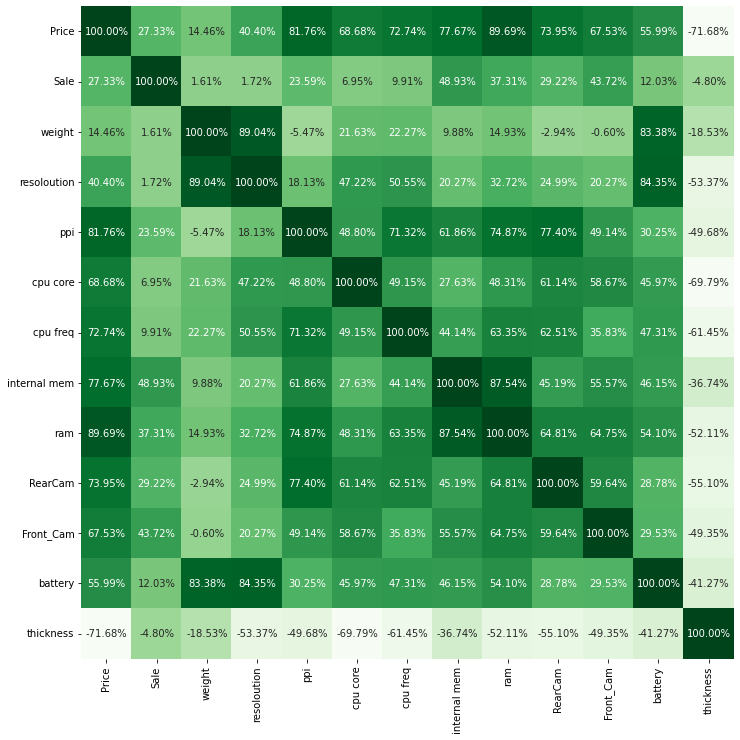

In [144]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

In [145]:
# # plt.figure(figsize=(15,10))
# # sns.set_style('whitegrid')
# # dat = df["Price"][0:8]  
# # sns.countplot(x=dat,data=df)

# plt.figure(figsize=(15,10))
# sns.set_style('whitegrid')
# d = df["cpu freq"][0:8] 
# sns.countplot(x=d,data=df)




In [146]:
# plt.figure(figsize=(15,10))
# sns.set_style('whitegrid')
# da = df["Sale"][0:10] 
# sns.countplot(x=da,data=df)

In [147]:
# plt.figure(figsize=(15,10))
# sns.set_style('whitegrid')
# dat = df["resoloution"][0:8] 
# sns.countplot(x=dat,data=df)

In [148]:
# plt.figure(figsize=(15,10))
# sns.set_style('whitegrid')
# dat = df["cpu freq"][0:6]
# sns.countplot(x=dat,data=df)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


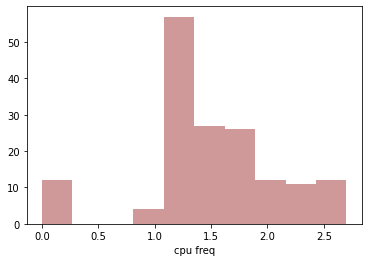

In [149]:
sns.distplot(df['cpu freq'].dropna(),kde=False,color='darkred',bins=10)

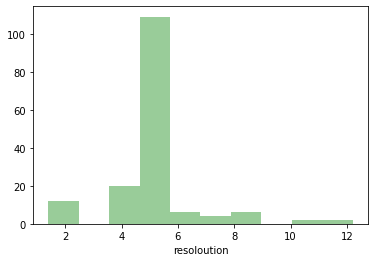

In [150]:
sns.distplot(df['resoloution'].dropna(),kde=False,color='green',bins=10)

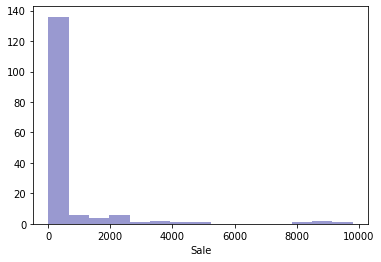

In [151]:
sns.distplot(df['Sale'].dropna(),kde=False,color='darkblue',bins=15)

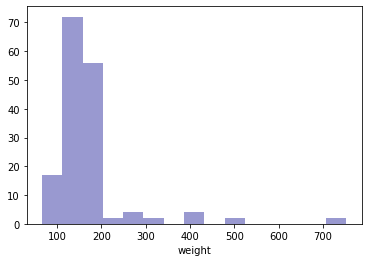

In [152]:
sns.distplot(df['weight'].dropna(),kde=False,color='darkblue',bins=15)

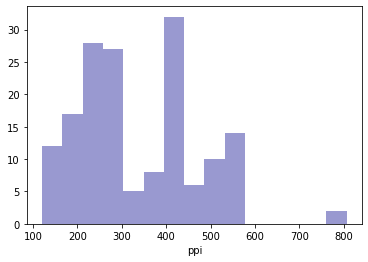

In [153]:
sns.distplot(df['ppi'].dropna(),kde=False,color='darkblue',bins=15)

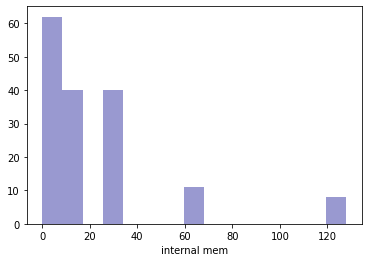

In [154]:
sns.distplot(df['internal mem'].dropna(),kde=False,color='darkblue',bins=15)

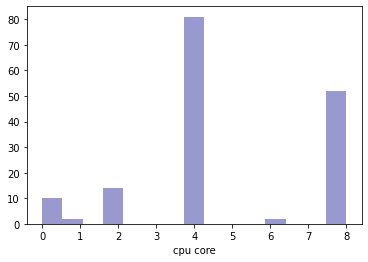

In [155]:
sns.distplot(df['cpu core'].dropna(),kde=False,color='darkblue',bins=15)

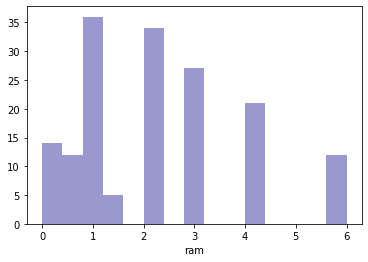

In [156]:
sns.distplot(df['ram'].dropna(),kde=False,color='darkblue',bins=15)

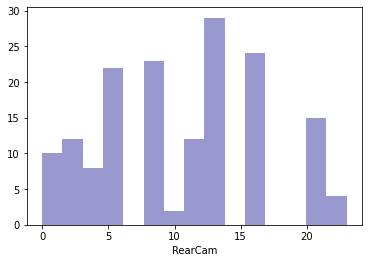

In [157]:
sns.distplot(df['RearCam'].dropna(),kde=False,color='darkblue',bins=15)

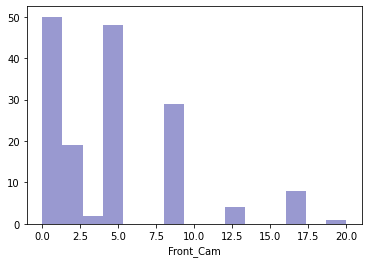

In [158]:
sns.distplot(df['Front_Cam'].dropna(),kde=False,color='darkblue',bins=15)

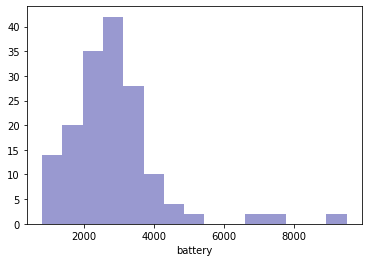

In [159]:
sns.distplot(df['battery'].dropna(),kde=False,color='darkblue',bins=15)


In [160]:
# # import module
# # STANDARDASIATION
# from sklearn.preprocessing import StandardScaler

# # create data
# # data = [[11, 2], [3, 7], [0, 10], [11, 8]]

# # scale features
# scaler = StandardScaler()
# model=scaler.fit(X)
# X=model.transform(X)

# # print scaled features
# print(X)

In [161]:
# # import module
# #NORMALISATION
# from sklearn.preprocessing import MinMaxScaler

# # create data
# # data = [[11, 2], [3, 7], [0, 10], [11, 8]]

# # scale features
# scaler = MinMaxScaler()
# model=scaler.fit(X)
# X=model.transform(X)

# # print scaled features
# print(X)


In [162]:
# plt.figure(figsize=(10,10))
# sns.pairplot(data=df)

## Feature Selection

In [163]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [164]:
X = df.iloc[:,1:7]  # Independent columns
y = df.iloc[:,[-1]] # Yarget column i.e price range 

In [165]:
# Apply SelectKBest class to extract top 10 best features
# bestfeatures = SelectKBest(score_func=chi2, k=4)
# fit = bestfeatures.fit(X,y)

In [166]:
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
# # data = [[0, 0], [0, 0], [1, 1], [1, 1]]
# st = MinMaxScaler()
# X=st.fit_transform(X)
# # StandardScaler()

In [167]:
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)

In [168]:
# # Concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [169]:
# featureScores

In [170]:
# print(featureScores.nlargest(4,'Score'))  #print 5 best features

### Feature Importance

In [171]:
# Fiting Feature Seclection using Ensemble Methods
# from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
# model = ExtraTreesClassifier()
# model.fit(X,y)

In [172]:
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

In [173]:
# # Plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

In [174]:
# df.head()

## Model Fitting 

### Random Forest Regressor 

In [175]:
# Value Assigning
X = df.iloc[:,[6,2,4,5,1,3]]
y = df.iloc[:,[-1]]

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [177]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

<ipython-input-177-5d4b94c79232>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)


RandomForestRegressor()

In [178]:
y_pred = reg.predict(X_train)

In [179]:
# Training Score
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 98.17014818545293


In [180]:
# Testing Score
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 78.14285021595637


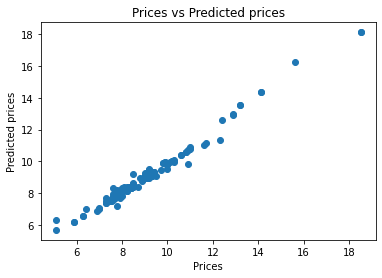

In [181]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [182]:
# Sample Prediction
reg.predict([[4.0,128.0,6.00,48,13.0,4000]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.502])

In [183]:
import time
from sklearn.ensemble import RandomForestRegressor
start = time.time()
dtree =RandomForestRegressor(n_estimators=100)
dtree.fit(X_train,y_train)
y_pred_dcc = dtree.predict(X_test)
end = time.time()

<ipython-input-183-76901e6ddeac>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dtree.fit(X_train,y_train)


In [184]:
dtree.score(X_train,y_train)

0.9776948330445623

In [233]:
# Training Score
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 98.17014818545293


In [234]:
# Testing Score
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 78.14285021595637


In [185]:
dec = end-start
time = dec
time

0.3156318664550781

In [186]:
# Make Predictions on the validation dataset Plot accuracy  varying parameters
acc = []
import time
from sklearn.metrics import mean_squared_error #Import scikit-learn metrics module for accuracy calculation
#from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
acc_time = []
for i in range(6):
  start = time.time()
  clf = RandomForestRegressor(n_estimators=100)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accu = clf.score(X_train,y_train)*100
  
  end = time.time()
  dur = end - start
  acc.append(accu)
  acc_time.append(dur)

<ipython-input-186-51de15cdb1f1>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
<ipython-input-186-51de15cdb1f1>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
<ipython-input-186-51de15cdb1f1>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
<ipython-input-186-51de15cdb1f1>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)
<ipython-input-186-51de15cdb1f1>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

In [187]:
acc #mean square error

[97.75870424820764,
 97.83413603994009,
 97.67561342141381,
 97.94601543045815,
 97.44930992386155,
 97.98333350374917]

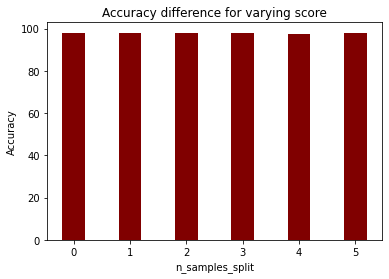

In [188]:
#t Plot time  for varying parameters
# acc = []
models = []
for i in range(6):
  no = i
  models.append(no)
# models = ["Decision Tree","Random Forest","SVM"]
plt.bar(models, acc, color ='maroon',width = 0.4)

plt.xlabel("n_samples_split")
plt.ylabel("Accuracy")
plt.title("Accuracy difference for varying score")
plt.show()

In [189]:
acc_time

[0.3508429527282715,
 0.36934614181518555,
 0.4654216766357422,
 0.6934127807617188,
 0.3429832458496094,
 0.4707815647125244]

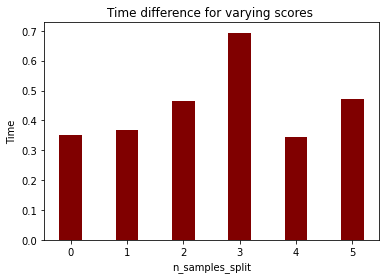

In [190]:
models = []
for i in range(6):
  no = i
  models.append(no)
# models = ["Decision Tree","Random Forest","SVM"]
plt.bar(models, acc_time, color ='maroon',width = 0.4)

plt.xlabel("n_samples_split")
plt.ylabel("Time")
plt.title("Time difference for varying scores ")
plt.show()

In [191]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)

# Use the built-in cross_val_score function to perform k-fold CV
scores = cross_val_score(rf, X, y, cv=5)

# 
print("Cross validation scores: {}".format(scores))
print(scores)



/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Cross validation scores: [0.06630378 0.60669992 0.33361773 0.50908207 0.80662712]
[0.06630378 0.60669992 0.33361773 0.50908207 0.80662712]


### Decision tree Regressor

In [192]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)


In [193]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [194]:
y_pred = regressor.predict(X_train)

In [231]:
# Training Score
print("Training Accuracy:",regressor.score(X_train,y_train)*100)

Training Accuracy: 100.0


In [232]:
# Testing Score
print("Testing Accuracy:",regressor.score(X_test,y_test)*100)

Testing Accuracy: 88.35031103142911


In [197]:
# Sample Prediction
reg.predict([[4.0,128.0,6.00,48,13.0,4000]])


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.502])

In [198]:
import time
from sklearn.tree import DecisionTreeRegressor
start = time.time()
dtree =DecisionTreeRegressor(random_state=0)
dtree.fit(X_train,y_train)
y_pred_dcc = dtree.predict(X_test)
end = time.time()

In [199]:
dtree.score(X_train,y_train)

1.0

In [200]:
dec = end-start
time = dec
time

0.007452964782714844

In [201]:
# Make Predictions on the validation dataset Plot accuracy  varying parameters
acc_2 = []
import time
from sklearn.metrics import mean_squared_error #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
acc_time_2 = []
for i in range(10):
  start = time.time()
  clf = DecisionTreeRegressor(min_samples_split=2)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accu = mean_squared_error(y_pred,y_test)*100
  
  end = time.time()
  dur = end - start
  acc_2.append(accu)
  acc_time_2.append(dur)

In [202]:
acc_2 #mean square error

[50.219512195121965,
 170.34146341463418,
 202.29268292682931,
 174.4878048780488,
 173.2926829268293,
 176.0487804878049,
 174.4878048780488,
 171.56097560975618,
 174.68292682926833,
 173.2926829268293]

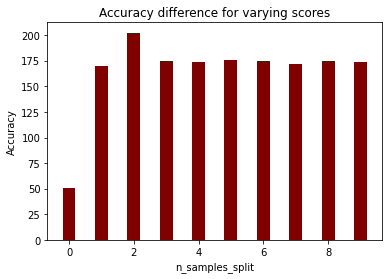

In [203]:
#t Plot time  for varying parameters
# acc = []
models = []
for i in range(10):
  no = i
  models.append(no)
# models = ["Decision Tree","Random Forest","SVM"]
plt.bar(models, acc_2, color ='maroon',width = 0.4)

plt.xlabel("n_samples_split")
plt.ylabel("Accuracy")
plt.title("Accuracy difference for varying scores")
plt.show()

In [204]:
acc_time_2

[0.009211063385009766,
 0.009947538375854492,
 0.007828712463378906,
 0.011284112930297852,
 0.01077413558959961,
 0.023083925247192383,
 0.01898670196533203,
 0.0072460174560546875,
 0.008786439895629883,
 0.007852792739868164]

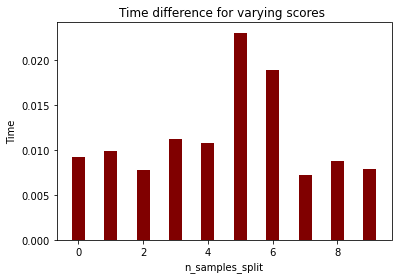

In [205]:
models = []
for i in range(10):
  no = i
  models.append(no)
# models = ["Decision Tree","Random Forest","SVM"]
plt.bar(models, acc_time_2, color ='maroon',width = 0.4)

plt.xlabel("n_samples_split")
plt.ylabel("Time")
plt.title("Time difference for varying scores ")
plt.show()

In [206]:
#k fold cross validation score 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Create a Decision Tree Regressor
dt = DecisionTreeRegressor()

# Use the built-in cross_val_score function to perform k-fold CV
scores = cross_val_score(dt, X, y, cv=5)


print("Cross validation scores: {}".format(scores))
# print(scores)



Cross validation scores: [-0.27921858  0.74833682 -0.32072828  0.24373342  0.80666851]


KNN REGRESSOR


In [207]:
# from sklearn.linear_model import Lasso

# reg = Lasso(alpha=1)
# reg.fit(X_train, y_train)
# y_pred = reg.predict(X_test)

In [208]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# mean_squared_error(y_pred,y_test)

In [209]:
# print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
# print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

In [210]:
import time

start = time.time()
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2) 
neigh.fit(X_train,y_train)
end = time.time()

In [211]:
neigh.score(X_train,y_train)

0.9340663518630076

In [212]:
dec = end-start
time = dec
time

0.0063283443450927734

In [213]:
acc_3 = []
import time
from sklearn.metrics import mean_squared_error #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import r2_score

acc_time_3 = []
for i in range(5):
  start = time.time()
  clf=KNeighborsRegressor(n_neighbors=2) 

  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accu = clf.score(X_train,y_train)*100
  
  end = time.time()
  dur = end - start
  acc_3.append(accu)
  acc_time_3.append(dur)

In [214]:
acc_3


[93.40663518630076,
 93.40663518630076,
 93.40663518630076,
 93.40663518630076,
 93.40663518630076]

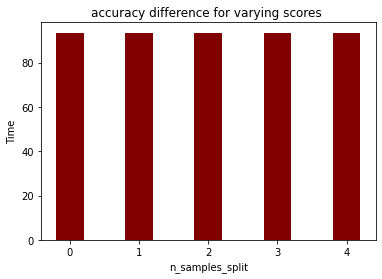

In [215]:
models = []
for i in range(5):
  no = i
  models.append(no)

plt.bar(models, acc_3, color ='maroon',width = 0.4)

plt.xlabel("n_samples_split")
plt.ylabel("Time")
plt.title("accuracy difference for varying scores ")
plt.show()

In [216]:
acc_time_3

[0.016600847244262695,
 0.007700204849243164,
 0.0068950653076171875,
 0.006406545639038086,
 0.00785374641418457]

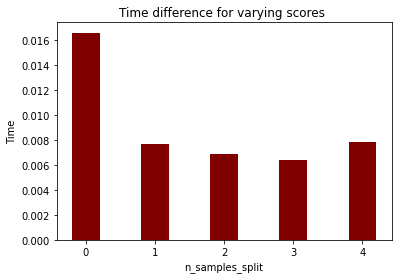

In [217]:
models = []
for i in range(5):
  no = i
  models.append(no)
# models = ["Decision Tree","Random Forest","SVM"]
plt.bar(models, acc_time_3, color ='maroon',width = 0.4)

plt.xlabel("n_samples_split")
plt.ylabel("Time")
plt.title("Time difference for varying scores ")
plt.show()

In [218]:
from sklearn.metrics import mean_absolute_error
# mean_absolute_error
y_p = neigh.predict(X_test)
mean_absolute_error(y_p,y_test)

0.9073170731707316

In [219]:
print("Training Accuracy:",neigh.score(X_train,y_train)*100)


Training Accuracy: 93.40663518630076


In [220]:
print("Testing Accuracy:",neigh.score(X_test,y_test)*100)

Testing Accuracy: 64.41331866460219


In [221]:
# dec = end-start
# time = dec
# time

In [222]:
#k fold  cross validation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Create a KNN regressor
knn = KNeighborsRegressor(n_neighbors=7)

# Use the built-in cross_val_score function to perform k-fold CV
scores = cross_val_score(knn, X, y, cv=5)
print(scores)

[-0.13937962  0.37403846  0.40771958  0.19597063 -0.23617852]
